In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 연습문제

In [27]:
# 문제 1
image = np.zeros((10, 10))
for idx, i in enumerate(range(2, 7)):
    for c in range(idx + 1):
        image[i, c + 3] = 1

def cal_s(image, y, x):
    A = image[y-1:y+2, x-1:x+2]
    s_values = []
    for v in [-1, 0, 1]:
        for u in [-1, 0, 1]:
            B = image[y-1+v:y+2+v, x-1+u:x+2+u]
            s = np.sum((A-B)**2)
            s_values.append(s)
    return np.array(s_values).reshape(3, 3)

# (1)
s = cal_s(image, 6, 3)
c = np.min([s[1,2], s[1,0], s[2,0], s[0,1]])
print(s, c)
# (2)
s = cal_s(image, 4, 5)
c = np.min([s[1,2], s[1,0], s[2,0], s[0,1]])
print(s, c)

[[3. 2. 5.]
 [2. 0. 2.]
 [3. 2. 3.]] 2.0
[[0. 3. 5.]
 [2. 0. 3.]
 [3. 2. 0.]] 2.0


In [36]:
# 문제 2
image = np.zeros((10, 10), dtype=np.float32)
for idx, i in enumerate(range(2, 7)):
    for c in range(idx + 1):
        image[i, c + 3] = 1
        
ux = np.array([-1, 0, 1])
uy = ux.T
k = cv2.getGaussianKernel(3, 1)
g = np.outer(k, k.T)

dy = cv2.filter2D(image, cv2.CV_32F, uy)
dx = cv2.filter2D(image, cv2.CV_32F, ux)
dyy = dy*dy
dxx = dx*dx
dyx = dy*dx
gdyy = cv2.filter2D(dyy, cv2.CV_32F, g)
gdxx = cv2.filter2D(dxx, cv2.CV_32F, g)
gdyx = cv2.filter2D(dyx, cv2.CV_32F, g)
C = (gdyy*gdxx - gdyx*gdyx)-0.04*(gdyy+gdxx)*(gdyy+gdxx)

# (1)
A = np.array([[gdyy[6,3], gdyx[6,3]],
             [gdyx[6,3], gdxx[6,3]]])
print(A, C[6,3])
# (2)
A = np.array([[gdyy[4,5], gdyx[4,5]],
             [gdyx[4,5], gdxx[4,5]]])
print(A, C[4,5])

[[0.52697635 0.52697635]
 [0.52697635 0.52697635]] -0.04443265
[[0.60208994 0.60208994]
 [0.60208994 0.60208994]] -0.05800197


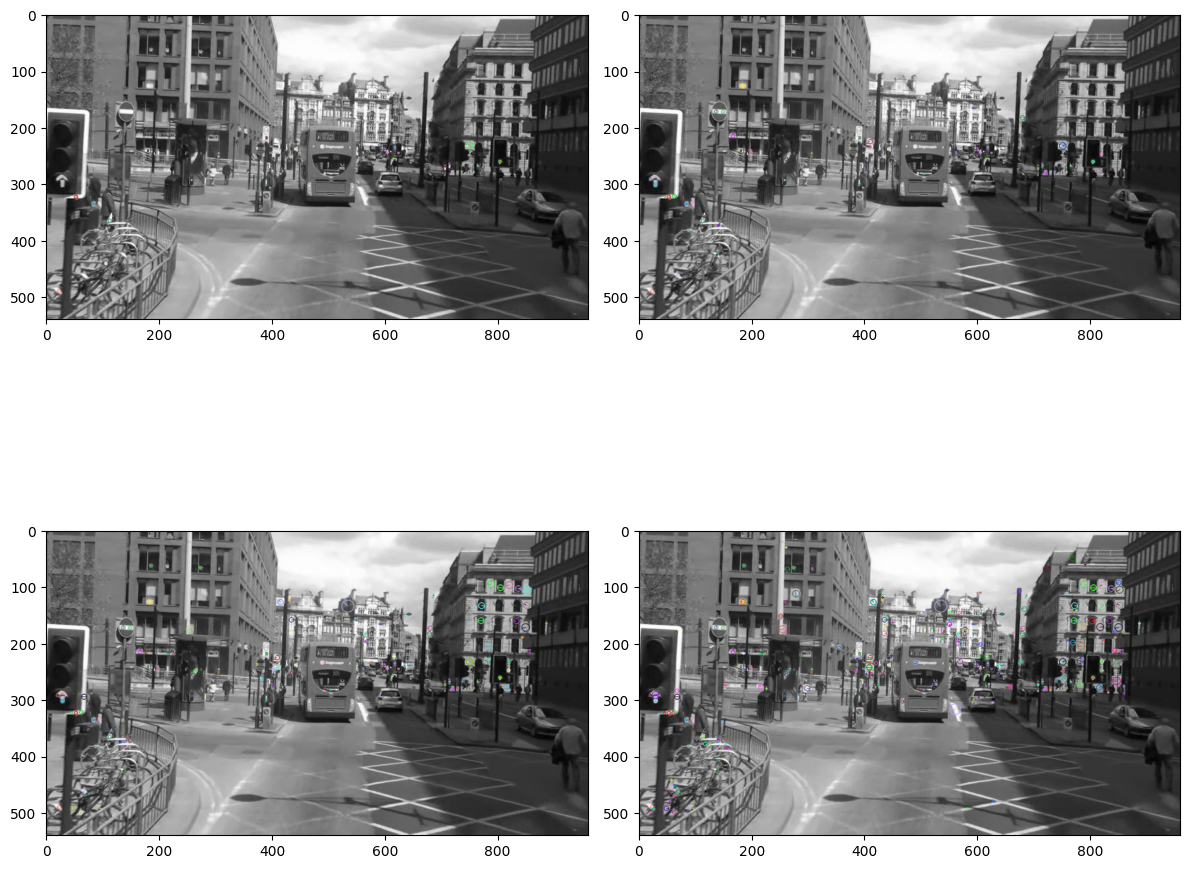

In [51]:
img=cv2.imread('./imgs/mot_color70.jpg') # 영상 읽기
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(12, 12))
for i in range(5, 9):
    sift=cv2.SIFT_create(nfeatures=2**i) 
    kp,des=sift.detectAndCompute(gray,None)

    gray=cv2.drawKeypoints(gray,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.subplot(2, 2, i - 4)
    plt.imshow(gray)
plt.tight_layout()

In [52]:
# 문제 4
'''
적분 이미지를 사용
descriptor 차원 수 축소
contrast를 이용한 빠른 매칭
'''

'\n적분 이미지를 사용\ndescriptor 차원 수 축소\ncontrast를 이용한 빠른 매칭\n'

In [53]:
# 문제 5
'''
eliminate the keypoints that have low contrast or lie very close to the edge
To deal with the low contrast keypoints, a second-order Taylor expansion is computed for each keypoint. 
If the resulting value is less than 0.03 (in magnitude), we reject the keypoint
'''

'\neliminate the keypoints that have low contrast or lie very close to the edge\nTo deal with the low contrast keypoints, a second-order Taylor expansion is computed for each keypoint. \nIf the resulting value is less than 0.03 (in magnitude), we reject the keypoint\n'

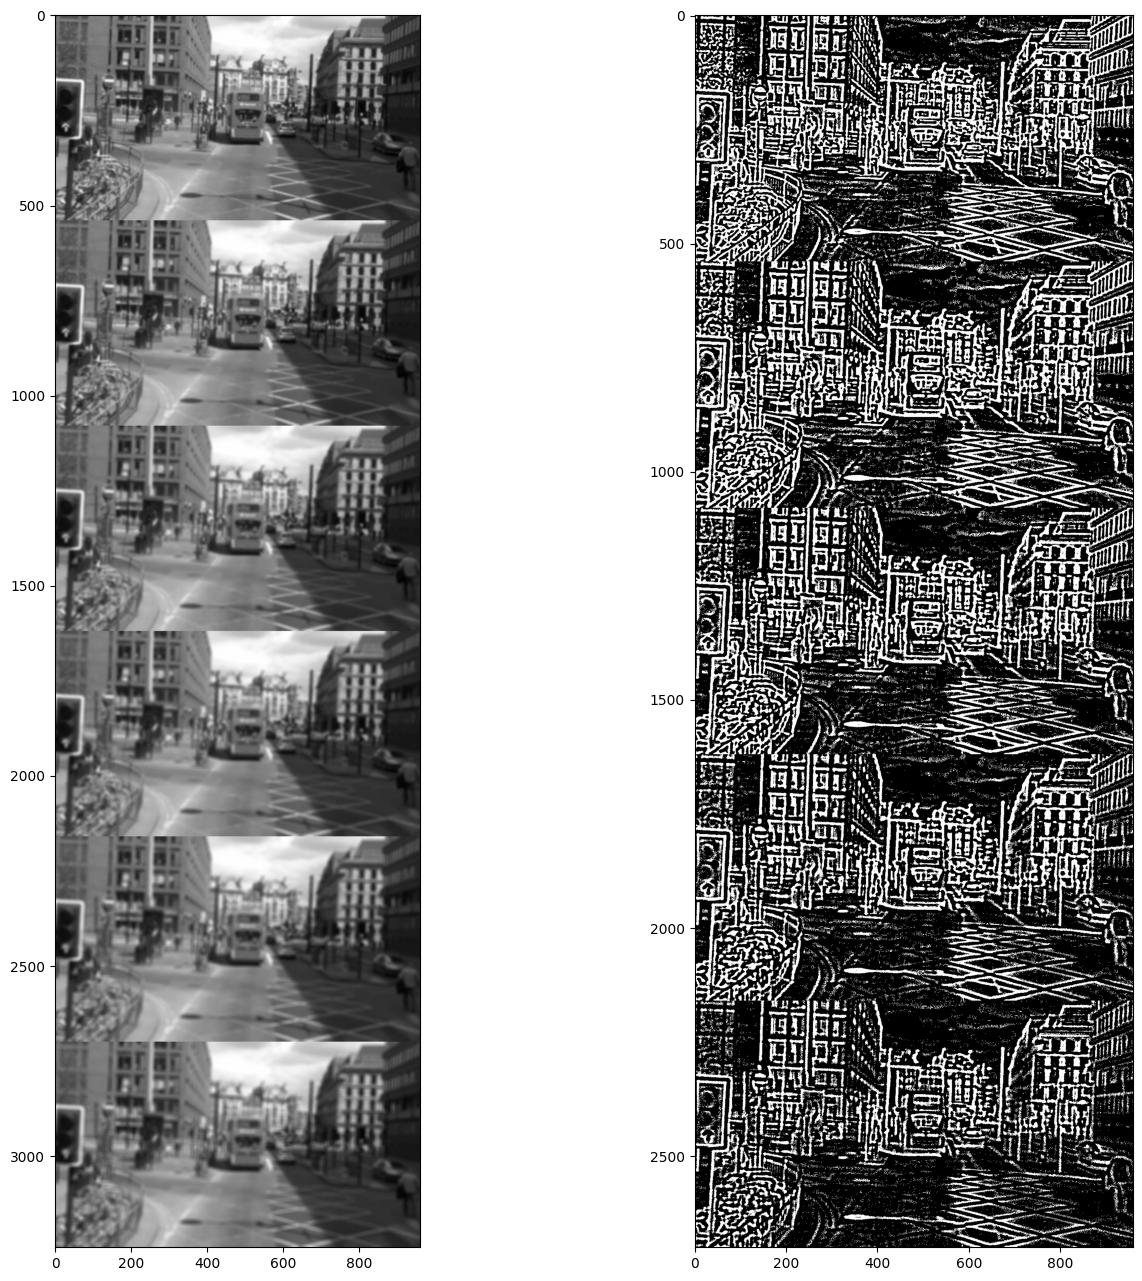

In [64]:
# 문제 6
image = cv2.imread('./imgs/mot_color70.jpg', cv2.IMREAD_GRAYSCALE)
sigma = 1.6
imgs = []
for i in range(1, 7):
    blur = cv2.GaussianBlur(image, (13, 13), sigma*(2**(1/3*i)))
    imgs.append(blur)
v_imgs = np.vstack(imgs)

dog = []
for i in range(len(imgs) - 1):
    dog.append(imgs[i] - imgs[i + 1])
v_dog = np.vstack(dog)
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(v_imgs, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(v_dog, cmap="gray")

In [65]:
# 문제 7
'''
FP를 줄이기 위해서는
t를 줄이고, d를 늘리고, e를 줄임
'''

'\nFP를 줄이기 위해서는\nt를 줄이고, d를 늘리고, e를 줄임\n'

In [ ]:
# 문제 8
